<a href="https://colab.research.google.com/github/jeymlb30/sp001/blob/main/modelisation_et_simulation_intra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split



In [73]:
path="/content/drive/MyDrive/dataset/depression_data.csv"
data = pd.read_csv(path)
data.head(10)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


Outliers in Age: []
Outliers in Number of Children: []
Outliers in Income: [202449.17, 169400.38, 180084.56, 193843.44, 177029.4, 209894.25, 209701.03, 186628.22, 198181.05, 191332.82, 168905.54, 194966.84, 178888.69, 162515.18, 191355.0, 168522.77, 195808.54, 188948.61, 205667.11, 188959.66, 192549.68, 182674.63, 193728.26, 187952.71, 179833.47, 184364.84, 162756.9, 172815.65, 181429.45, 165251.92, 167872.39, 178388.81, 200510.82, 174478.06, 185111.15, 186350.89, 169227.62, 195896.74, 180593.87, 168655.25, 199360.52, 186766.81, 183726.93, 168695.05, 169483.12, 170320.62, 192958.5, 177183.05, 203522.89, 179550.03, 173351.65, 199005.59, 184228.03, 174186.56, 191858.69, 184938.77, 189470.2, 167096.34, 170340.6, 192893.48, 165555.28, 167497.6, 169729.41, 177281.07, 195061.0, 203828.41, 160962.94, 199967.63, 174800.22, 185314.8, 167642.07, 188326.76, 161922.35, 171335.44, 181452.52, 197331.57, 197820.88, 190655.69, 163897.41, 195946.18, 190951.91, 206406.6, 208318.63, 171176.94, 185536.39,

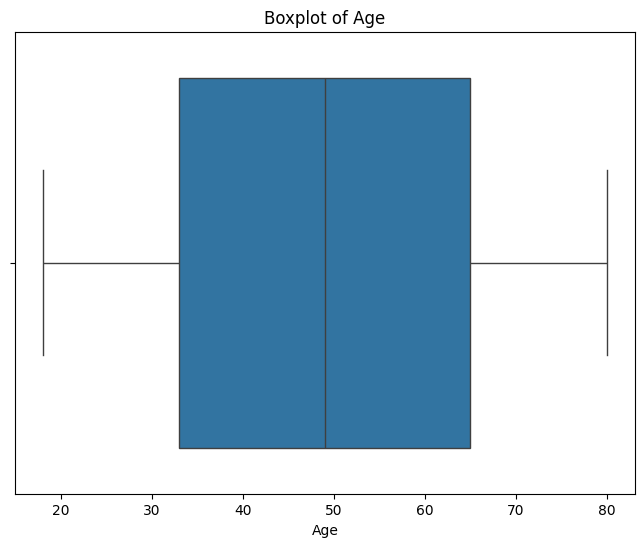

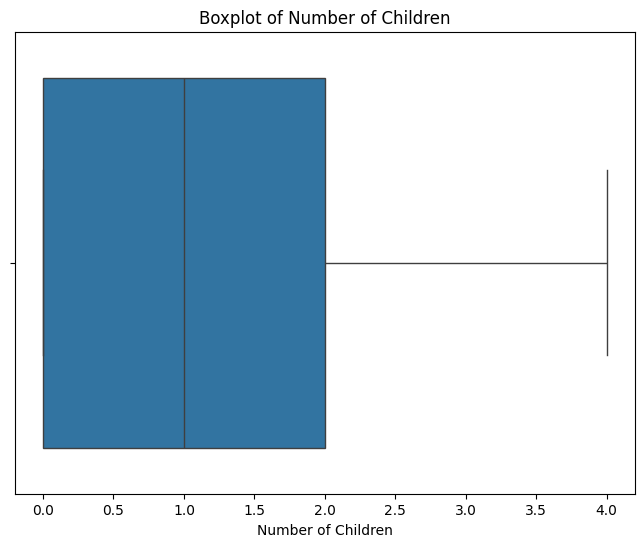

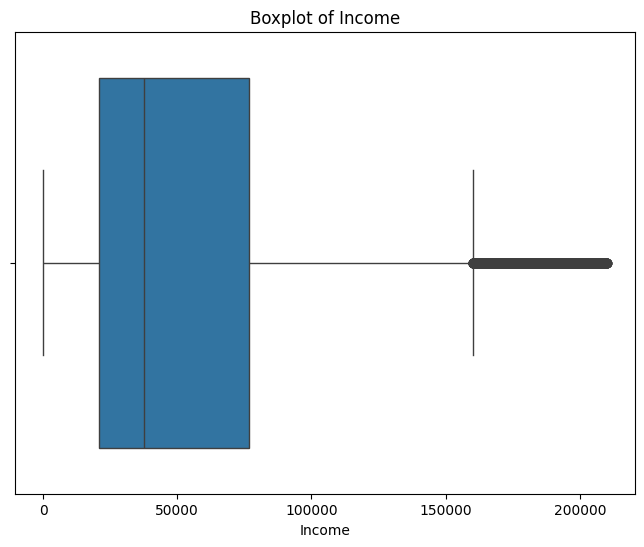

In [74]:
#1. indetifications des donnees aberante
def identify_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[~((data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR))]
  return outliers

for column in data.select_dtypes(include=np.number).columns:
  outliers = identify_outliers_iqr(data[column])
  print(f"Outliers in {column}: {outliers.tolist()}")

for column in data.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[column])
  plt.title(f"Boxplot of {column}")
  plt.show()


In [75]:
print(data.isnull().sum())


for column in data.select_dtypes(include=np.number).columns:
  data[column].fillna(data[column].mean(), inplace=True)

for column in data.select_dtypes(include='object').columns:
  data[column].fillna(data[column].mode()[0], inplace=True)

print(data.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


<ipython-input-75-bb7a73c876fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-75-bb7a73c876fa>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [76]:
le = LabelEncoder()

for column in data.select_dtypes(include='object').columns:
  data[column] = le.fit_transform(data[column])

print(data.head())

     Name  Age  Marital Status  Education Level  Number of Children  \
0   37154   31               1                1                   2   
1   78274   55               1                2                   1   
2  169167   78               3                3                   1   
3   34046   58               0                3                   3   
4  133232   18               2                2                   0   

   Smoking Status  Physical Activity Level  Employment Status     Income  \
0               2                        0                  1   26265.67   
1               2                        2                  0   42710.36   
2               2                        2                  0  125332.79   
3               2                        1                  1    9992.78   
4               2                        2                  1    8595.08   

   Alcohol Consumption  Dietary Habits  Sleep Patterns  \
0                    2               1               0   


In [77]:
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [78]:
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)

In [69]:
X = data.drop('Chronic Medical Conditions', axis=1)
y = (data['Chronic Medical Conditions'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

important_features = feature_importances[feature_importances['importance'] > 0.05]

print("Features with high importance for Chronic Medical Conditions prediction:")
important_features

Features with high importance for Chronic Medical Conditions prediction:


,feature,importance
0,Name,0.254913
8,Income,0.254748
1,Age,0.180222


In [70]:
numerical_features = data.select_dtypes(include=np.number)

variances = numerical_features.var()
threshold = 0.1
low_variance_features = variances[variances < threshold].index.tolist()

print("Features with low variance:")
print(low_variance_features)
df = data.drop(low_variance_features, axis=1)

Features with low variance:
[]


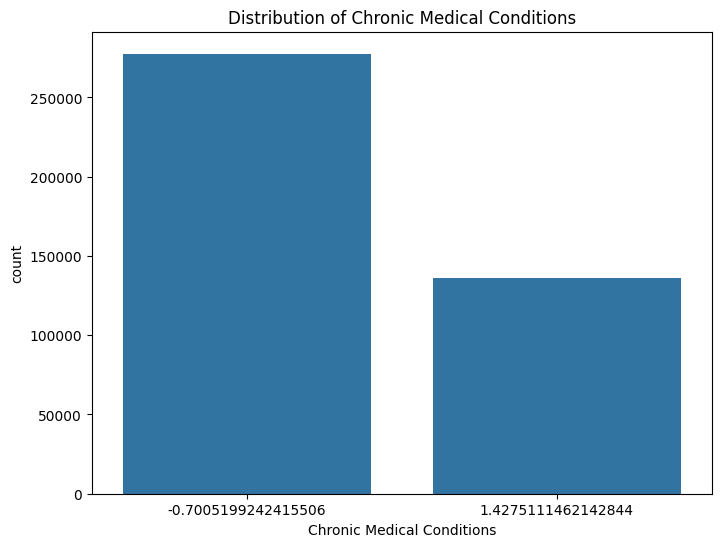

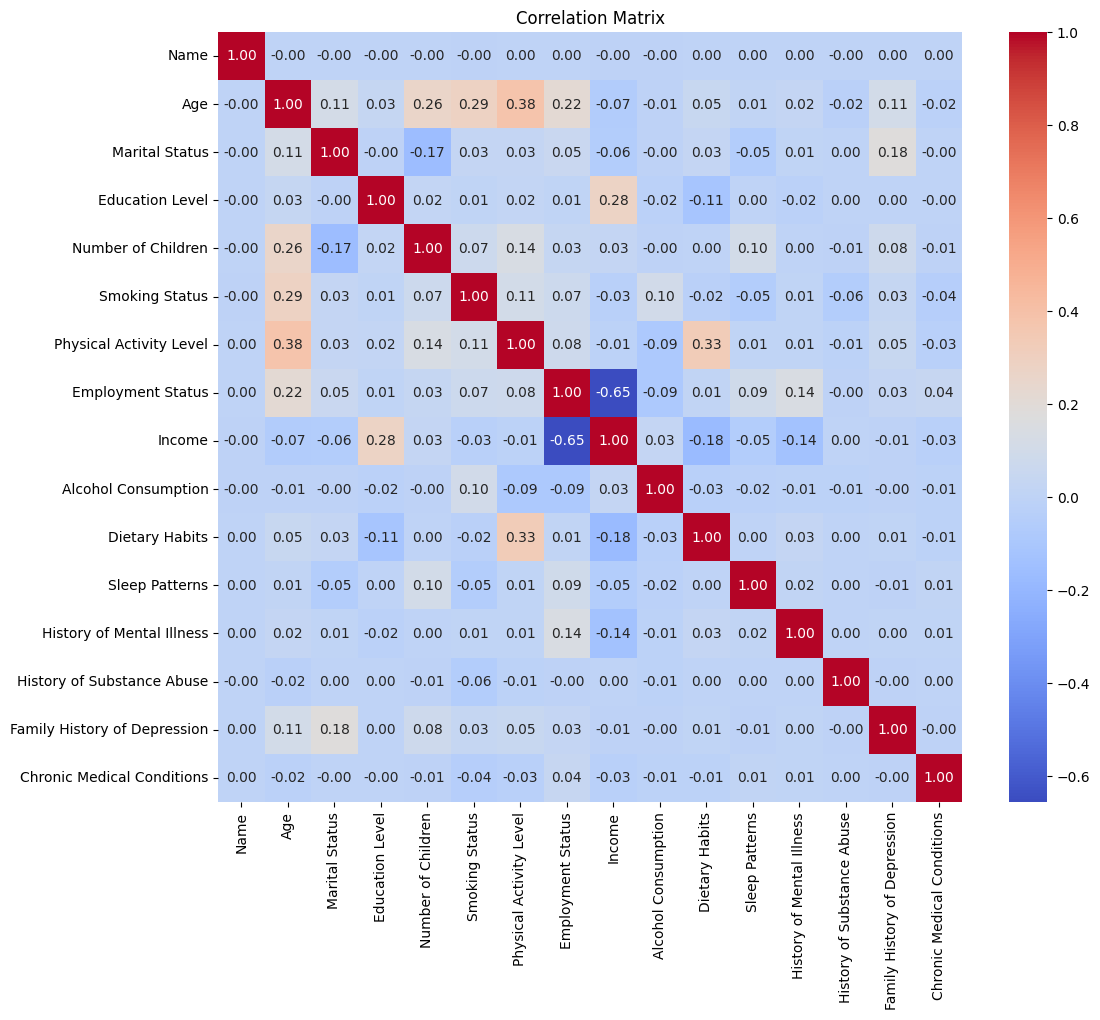

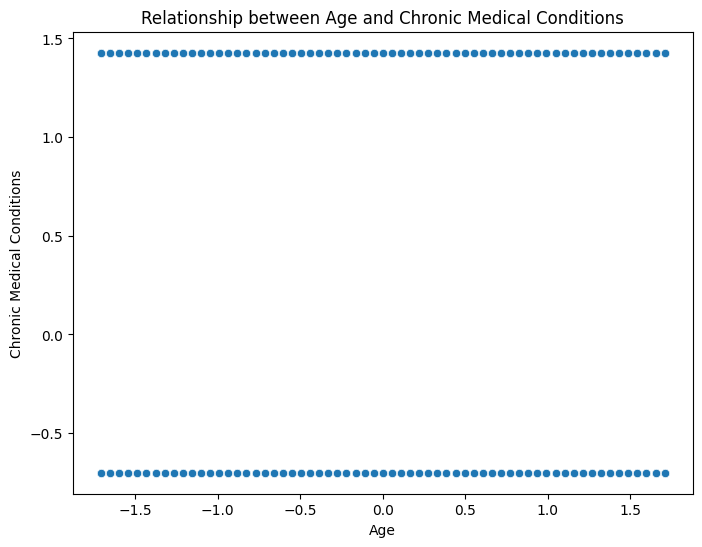

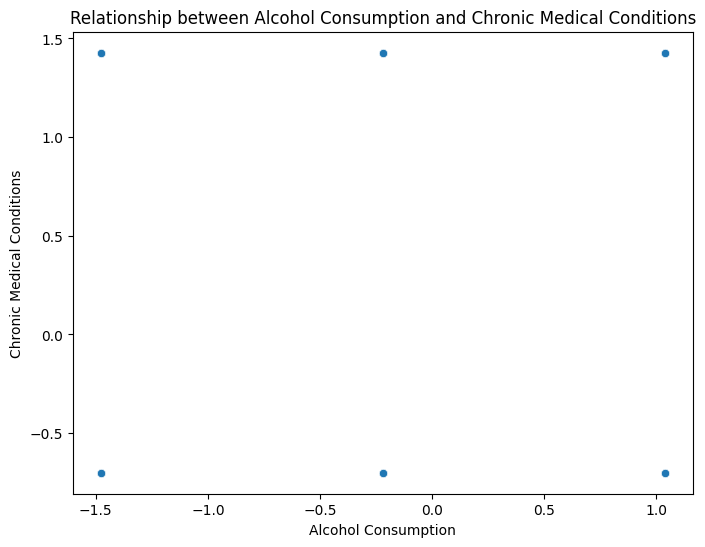

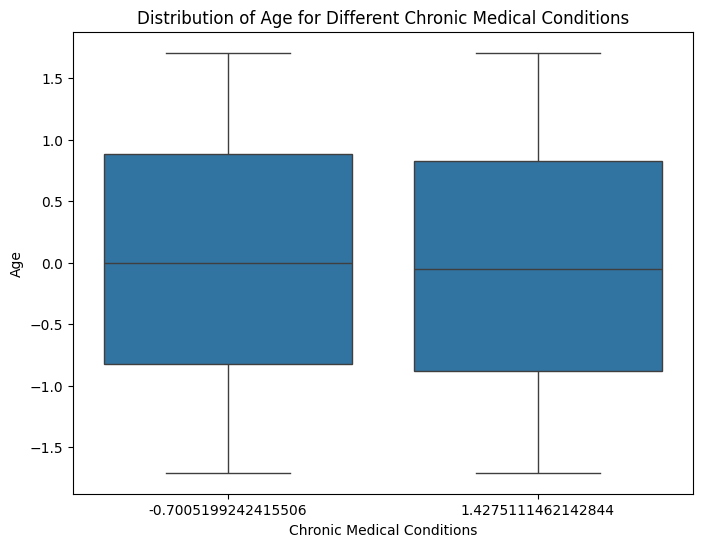

Frequency and Percentage of Chronic Medical Conditions:
Chronic Medical Conditions
-0.700520    277561
 1.427511    136207
Name: count, dtype: int64


,count
Chronic Medical Conditions,
-0.700520,67.081311
1.427511,32.918689


In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Chronic Medical Conditions', data=data)
plt.title('Distribution of Chronic Medical Conditions')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Chronic Medical Conditions', data=data)
plt.title('Relationship between Age and Chronic Medical Conditions')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alcohol Consumption', y='Chronic Medical Conditions', data=data)
plt.title('Relationship between Alcohol Consumption and Chronic Medical Conditions')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Chronic Medical Conditions', y='Age', data=df)
plt.title('Distribution of Age for Different Chronic Medical Conditions')
plt.show()



chronic_medical_conditions_counts = df['Chronic Medical Conditions'].value_counts()


chronic_medical_conditions_percentages = (chronic_medical_conditions_counts / len(df)) * 100


print("Frequency and Percentage of Chronic Medical Conditions:")
print(chronic_medical_conditions_counts)
chronic_medical_conditions_percentages